In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

from keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import applications
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [1]:
import tensorflow as tf; print(tf.__version__)


2.11.0


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

batch_size = 32
epochs = 50

train_generator = train_datagen.flow_from_directory(
    'E:/SBIR/Selected/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'E:/SBIR/Selected/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'E:/SBIR/Selected/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)




Found 624 images belonging to 13 classes.
Found 156 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [9]:
import netron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
model = Sequential()

# Add the first convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a fourth convolutional layer with 256 filters and a 3x3 kernel
model.add(Conv2D(256, (3, 3), activation='relu'))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a dense layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a final dense layer with 13 neurons and softmax activation for classification
model.add(Dense(13, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

model.save('model.h5')

netron.start('model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

('localhost', 8080)

In [4]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
19/19 [==============================] - 38s 2s/step - loss: 2.7748 - accuracy: 0.0726 - val_loss: 2.5575 - val_accuracy: 0.0859 - lr: 0.0010
Epoch 2/50
19/19 [==============================] - 26s 1s/step - loss: 2.5429 - accuracy: 0.0811 - val_loss: 2.4344 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 3/50
19/19 [==============================] - 28s 1s/step - loss: 2.2969 - accuracy: 0.2111 - val_loss: 1.9376 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 4/50
19/19 [==============================] - 24s 1s/step - loss: 2.0958 - accuracy: 0.3041 - val_loss: 1.9143 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 5/50
19/19 [==============================] - 24s 1s/step - loss: 1.9110 - accuracy: 0.3586 - val_loss: 1.6886 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 6/50
19/19 [==============================] - 24s 1s/step - loss: 1.7868 - accuracy: 0.3851 - val_loss: 1.4685 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 7/50
19/19 [==============================] - 23s 1s/step - loss: 1.6622 - a

In [5]:
import pickle
with open('model_CNN1.pkl', 'wb') as file:
      pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...layers\max_pooling2d_3
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
........

In [7]:
# Renders the charts for training accuracy and loss.
import matplotlib.pyplot as plt
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

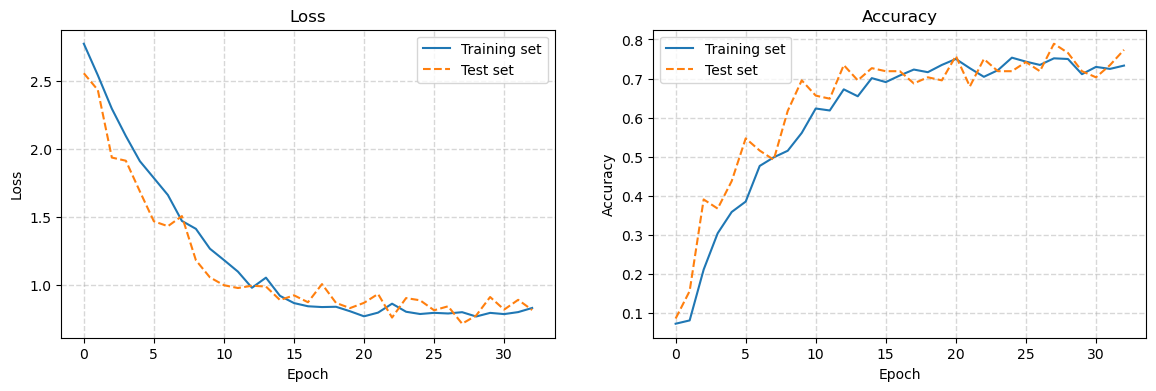

In [8]:
render_training_history(history)